<h4> Tokenizacja i wstępna filtracja

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
import string 

ex_sentence = "This is an example 1, showing off stop words filtration that occur using NLTK library."
words =  word_tokenize(ex_sentence.lower())
stop_words =  set(stopwords.words("english"))
words_withoutSP = [elem for elem in words if elem not in stop_words and elem not in string.punctuation and elem not in string.digits]
print(words_withoutSP)

['example', 'showing', 'stop', 'words', 'filtration', 'occur', 'using', 'nltk', 'library']


ale liczby i inne znaki interpunkcyjne...

In [2]:
ex_sentence = "This is an 1 example 134, showing off stop words filtration ... that occur using NLTK library."
words =  word_tokenize(ex_sentence.lower())
stop_words =  set(stopwords.words("english"))
words_withoutSP = [elem for elem in words if elem not in stop_words and elem not in string.punctuation and elem not in string.digits]
print(words_withoutSP)

['example', '134', 'showing', 'stop', 'words', 'filtration', '...', 'occur', 'using', 'nltk', 'library']


<h4> Zadanie1: Jak sprawdzić czy zadany ciąg tekstowy jest liczbą? Przykładowo '1', '12.3', '50,25' uznajemy za liczby, a '1a' już nie. Napisz odpowiednią funkcję, która zwraca wartość logiczną True lub False.

<h4> Klasa Text

In [3]:
from nltk.tokenize import word_tokenize
from nltk.text import Text #uzyteczna klasa z nltk (z pakietu text), m.in do tego zeby wyswietlic liste konkoradantów

In [4]:
file = open('example_text.txt','r')  
text = file.read().replace('\n','')
file.close()
txt_words = word_tokenize(text)
txt_words = [word.lower() for word in txt_words]   

In [5]:
len(text) #liczba wszytkich znakow

481486

In [6]:
print(text[:400]) #pierwsze 400 znakow 

No. 1111 (Sanitary), dated Ootacamund, the 6th October 1876. From-The Honourable W. HUDLESTON, Chief Secretary to the Govern- ment of Madras. To-The Offg. Secretary to the Government of India. Resolution of Government of India No. 1-137, dated 5th March 1875. Letter from Government of India No. 486, dated 5th September 1876. Letter to Government of India No. 1063, dated 26th ditto. REFERRING to th


In [7]:
len(txt_words) #liczba tokenow

93514

In [8]:
len(set(txt_words)) #liczba tokenow unikatowych

8147

In [9]:
txt_words.count("woman") #ile razy wystapilo slowo woman?

20

In [10]:
t = Text(txt_words) #tworze obiekt klasy Text, uzyteczne pozniej

In [11]:
print(t)

<Text: no . 1111 ( sanitary ) , dated...>


In [12]:
print(t.concordance('woman')) #wyswietla wszystkie konteksty slowa "woman"

Displaying 20 of 20 matches:
s of age , a sweeper , who married a woman who had leprosy , and at the age of 
e of sitabu , aged 40 , a muhammadan woman . her grand- father and father were 
ung man deliberately married a leper woman , and became himself a leper at the 
contrary . in no . 6 a man marries a woman whose grandfather and father had bee
 lepers . in no . 10 a man marries a woman whose father had died of leprosy . i
applies to these cases . in no . 2 a woman marries a man whose father and elder
n in the case of a man who marries a woman of notoriously leper family . in no 
toriously leper family . in no . 5 a woman marries a man whose elder brother wa
d continued to cohabit with a native woman after she had been attacked with lep
isen from intermarriage of a man and woman in both of whom leprosy was heredita
s a leper ; he is now married to the woman , and they both live in the asylum .
een accompanied by a healthy looking woman , and by this means , although all h
editary tra

<h4> Zadanie2: Wyświetl wszystkie konteksty słowa $death$.

In [13]:
t.concordance('woman',lines=3) #wyswietl pierwsze trzy konteksty slowa woman

Displaying 3 of 20 matches:
s of age , a sweeper , who married a woman who had leprosy , and at the age of 
e of sitabu , aged 40 , a muhammadan woman . her grand- father and father were 
ung man deliberately married a leper woman , and became himself a leper at the 


In [14]:
con_list = t.concordance_list("woman") #zapisuje do listy konkordanty słowa "woman"

In [15]:
len(con_list)

20

In [16]:
print(con_list[0])

ConcordanceLine(left=[':', 'no', '.', '1.-the', 'case', 'of', 'nachal', ',', '40', 'years', 'of', 'age', ',', 'a', 'sweeper', ',', 'who', 'married', 'a'], query='woman', right=['who', 'had', 'leprosy', ',', 'and', 'at', 'the', 'age', 'of', '24', 'became', 'himself', 'a', 'leper', '.', 'no', 'one', 'of'], offset=12196, left_print='s of age , a sweeper , who married a', right_print='who had leprosy , and at the age of ', line='s of age , a sweeper , who married a woman who had leprosy , and at the age of ')


In [17]:
print("z lewej:", con_list[0][4], "| z prawej:", con_list[0][5])

z lewej: s of age , a sweeper , who married a | z prawej: who had leprosy , and at the age of 


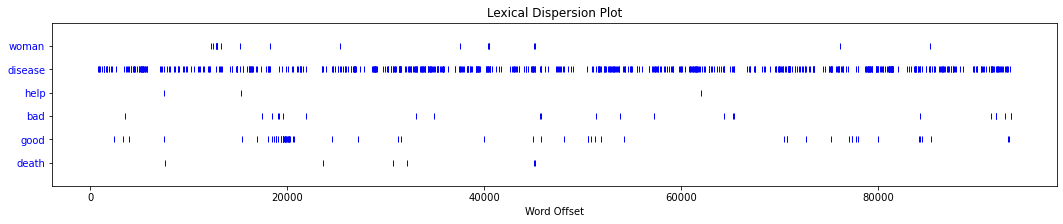

In [18]:
#lexical dispersion plot, pokazuje jak zadane przez nas slowa rozkladają sie w dokumencie/korpusie

from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 3))
targets=['woman','disease', 'help', 'bad', 'good','death']
dispersion_plot(t, targets, ignore_case=True, title='Lexical Dispersion Plot')

<h4> Zliczanie tokenów w tekście

In [19]:
from nltk.probability import FreqDist

In [20]:
fdist = FreqDist(txt_words) #zliczam wystepowanie slow

In [21]:
fdist

FreqDist({'the': 5923, ',': 5332, '.': 5213, 'of': 4062, 'and': 2118, 'in': 2117, 'to': 1891, 'is': 1124, 'a': 1049, 'that': 816, ...})

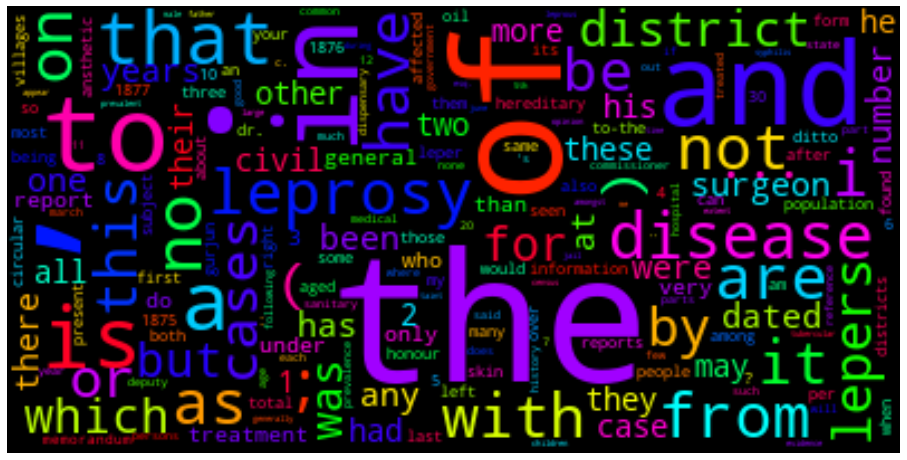

In [22]:
#wizualizacja tego co wyzej

import matplotlib.pyplot as plt
from wordcloud import WordCloud #trzeba doinstalowac

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(fdist)
plt.figure(figsize=(16,12)) #wymiar obrazka
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
fdist.N() #liczba wszystkich tokenow czyli len(txt_words)

93514

In [24]:
fdist['she'] #ile razy wystąpilo 'she'?

26

In [25]:
fdist.freq('she') #częstość występowania 'she' czyli 26/93505

0.00027803323566524796

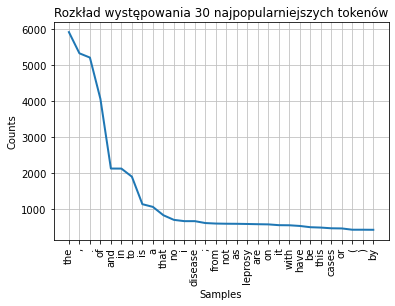

<AxesSubplot:title={'center':'Rozkład występowania 30 najpopularniejszych tokenów'}, xlabel='Samples', ylabel='Counts'>

In [26]:
fdist.plot(30,title='Rozkład występowania 30 najpopularniejszych tokenów') #rysuje wykres

Zauważ, że powyższy wykres jest tak naprawde przykładem działania prawa Zipfa w praktyce. Zgodnie z nim  $f⋅r \approx C$, czyli  $f \approx C/r$  (hiperbola), gdzie:

f  - częstotliwość danego słowa, 

r  - ranga,

C  - pewna stała.

<h4> Zadanie3: Narysuj analogiczny wykres jak wyżej, z tym że tym razem nie uwzględniaj stop words, znaków interpunkcyjnych i liczb. Zapisz te wybrane tokeny do listy o nazwie  filtered_words .

<h4> Kolokacje

In [27]:
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

In [28]:
#cel: szukamy slow ktore czesto wystepuja razem

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(txt_words, 5) #dopuszczamy okno 5 slow miedzy slowami

In [29]:
finder.apply_freq_filter(10) #znajdz slowa ktore wystepuja ze sobą co najmniej 10 razy w tekscie

In [30]:
finder.nbest(bigram_measures.likelihood_ratio, 15) #pokaz pierwsze 15 wynikow

[('...', '...'),
 ('(', ')'),
 ('i', 'have'),
 ('no', 'dated'),
 ('civil', 'surgeon'),
 ('the', 'disease'),
 (',', '.'),
 (',', 'and'),
 ('gurjun', 'oil'),
 ('surgeon', 'general'),
 ('have', 'been'),
 ('deputy', 'general'),
 ('it', 'is'),
 ('ditto', 'ditto'),
 ('have', 'honour')]

<h4> Zadanie4: Wykonaj analogiczną analize jak wyżej, z tym że nie bierz pod uwagę stop words, znaków interpunkcyjnych ani liczb przy szukaniu kolokacji.

<h4> Korpus (Corpora) - zbiór tekstów lingwistycznych

<h4> Przykład1

In [46]:
from nltk.corpus import inaugural #przemowy prezydenckie

In [47]:
inaugural.readme().replace('\n', ' ') #co tam jest? (trzeba będzie wykonac jeszcze nltk.download('inaugural'))

'C-Span Inaugural Address Corpus  US presidential inaugural addresses 1789-2021  (Thanks to Kathleen Ahrens for compiling this corpus from the C-Span sources.)  '

In [48]:
print(inaugural.fileids()) #jakie dokladnie pliki tesktowe

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

<h4> Przykład2

In [34]:
from nltk.corpus import gutenberg #rozne teksty

In [35]:
gutenberg.readme().replace('\n', ' ')[:300] #co tam jest? (trzeba pobac nltk.download('gutenberg'))

'Project Gutenberg Selections http://gutenberg.net/  This corpus contains etexts from from Project Gutenberg, by the following authors:  * Jane Austen (3) * William Blake (2) * Thornton W. Burgess * Sarah Cone Bryant * Lewis Carroll * G. K. Chesterton (3) * Maria Edgeworth * King James Bible * Herman'

In [36]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


<h4> Przykład3

In [37]:
from nltk.corpus import movie_reviews #recenzje filmowe

In [38]:
print(movie_reviews.fileids()[990:1010]) #(nalezy wykonac nltk.download('movie_reviews'))

['neg/cv990_12443.txt', 'neg/cv991_19973.txt', 'neg/cv992_12806.txt', 'neg/cv993_29565.txt', 'neg/cv994_13229.txt', 'neg/cv995_23113.txt', 'neg/cv996_12447.txt', 'neg/cv997_5152.txt', 'neg/cv998_15691.txt', 'neg/cv999_14636.txt', 'pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt']


In [39]:
movie_reviews.categories() #są dwie kategorie recenzji: negatywne (neg) i pozytywne (pos)

['neg', 'pos']

<h4> Jak zmienia sie użycie słów w kolejnych latach?

https://books.google.com/ngrams

In [40]:
from nltk.corpus import inaugural #posłużymy sie korpusem inaugural
from nltk.text import Text

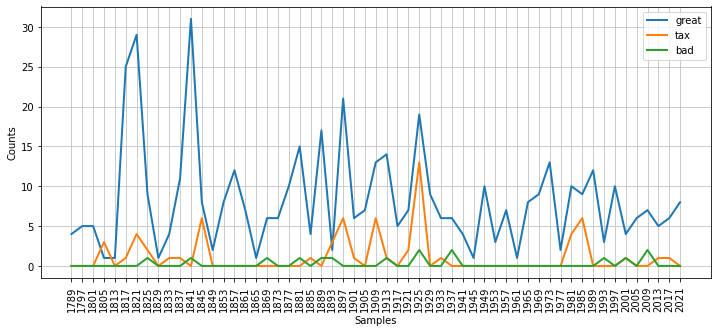

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
import nltk
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5) #wielkosc wykresu


targets=['great', 'bad', 'tax'] #ktore slowa sprawdzamy

cfd = nltk.ConditionalFreqDist((target, fileid[:4]) #fieleid[:4] jest po to zeby na rysnku pokazywal tylko pierwsze cztery znaki z nazwy (czyli rok)
    for fileid in inaugural.fileids() #dla kolejnych plikow
    for word in inaugural.words(fileid) #dla kolejnych slow w tych plikach
    for target in targets #dla kazdego slowa z listy zadanych przez nas
    if word.lower().startswith(target)) #czy slowo w tekscie zaczyna sie od naszego slowa targetu?
cfd.plot()

<h4> POS

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [42]:
import nltk
from nltk.tag import pos_tag

In [43]:
x = ["three", "dog", "cats", "Einstein", "better"]

In [44]:
print(nltk.pos_tag(x)) #trzeba będzie pobrac nltk.download('averaged_perceptron_tagger')

[('three', 'CD'), ('dog', 'NN'), ('cats', 'NNS'), ('Einstein', 'NNP'), ('better', 'JJR')]


In [45]:
import nltk.help
nltk.help.upenn_tagset('CD') #sprawdz co znaczy CD, trzeba pobrac nltk.download('tagsets')

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...


<h4> Zadanie5: Przeanalizuj ponownie korpus  inaugural. <br>
    
    
- zapisz wszystkie tokeny z wszystkich dokumentów do jednej listy ($inaugural\_tokens=inaugural.words()$)

- zmień wszystkie litery na małe

- ile występuje unikatowych tokenów?

- wyznacz 7 najczęstszych kolokacji występujących co najmniej 10 razy nie zawierających stop words, znaków interpunkcyjncyh, liczb (dopuszczamy okno 5)

- wykonaj metode $nltk.pos\_tag$ na liście unikatowych tokenów i zapisz wyniki pod nazwą $tagged\_inaugural\_tokens$
zapisz do listy $nouns$ tylko te tokeny z $inaugural\_tokens$, które są rzeczownikami (tag NN lub NNs)

- jakie trzy rzeczowniki pojawiały się najczęściej?

- narysuj wykres rozkładu tych trzech rzeczowników w kolejnych latach

- narysuj wykres typu  wordcloud  dla wszystkich rzeczowników

- jakie trzy przymiotniki w stopniu wyższym i najwyższym występowały najczęściej we wszystkich przemowach? (tag JJR/JJS)

- zobacz jak wygląda rozkład występowania słowa  war  w całym korpusie (lexical dispersion plot)